In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zstandard as zstd

In [2]:
# decompress zst files and concat into dataframe
decomp = zstd.ZstdDecompressor()
df_list = []
for i in range(100):
    with open(f"compressed/example_train_{i}.jsonl.zst", "rb") as f:
        reader = zstd.ZstdDecompressor().stream_reader(f)
        df_list.append(pd.read_json(reader, lines=True))
df = pd.concat(df_list, ignore_index=True)

# clean meta column
df["meta"] = df["meta"].apply(lambda x: x["redpajama_set_name"])
print(df.head())

                                                text                  meta
0  J.J. Abrams Returns To Write And Direct 'Star ...  RedPajamaCommonCrawl
1  Hire event staffing in Barrie, Ontario and dis...           RedPajamaC4
2  Pascal Pictures\nMovie Review: Spider-Man: No ...  RedPajamaCommonCrawl
3  Lej Assassination Tango hos Itunes for 39 kr.\...           RedPajamaC4
4  CBA legal challenge heads to B.C. Court of App...  RedPajamaCommonCrawl


In [3]:
print(df["meta"].value_counts())

meta
RedPajamaC4               548426
RedPajamaCommonCrawl      315580
RedPajamaStackExchange     49616
RedPajamaWikipedia         45521
RedPajamaGithub            35838
RedPajamaArXiv              2657
RedPajamaBook                362
Name: count, dtype: int64


In [4]:
print(df[df.meta == "RedPajamaGithub"].iloc[0].text)

package com.basho.riak.client.itest;

import static org.junit.Assert.*;

import org.apache.commons.httpclient.URIException;

import com.basho.riak.client.request.RequestMeta;
import com.basho.riak.client.response.HttpResponse;

public class Utils {

    public static RequestMeta WRITE_3_REPLICAS() { return RequestMeta.writeParams(3, 3); }

    public static void assertSuccess(HttpResponse response) {
        if (!response.isSuccess()) {
            StringBuilder msg = new StringBuilder("Failed ");
            msg.append(response.getHttpMethod().getName()).append(" ");
            try {
                msg.append(response.getHttpMethod().getURI().toString());
            } catch (URIException e) {
                msg.append(response.getHttpMethod().getPath());
            }
            msg.append(" -- ")
                .append(response.getHttpMethod().getStatusLine()).append("; ")
                .append("Response headers: ").append(response.getHttpHeaders().toString()).append("; ")
  

In [15]:
# drop Github and book rows
df = df[df.meta != "RedPajamaGithub"]
df = df[df.meta != "RedPajamaBook"]
# drop rows with less than 700 characters
df = df[df.text.apply(lambda x: len(x) > 700)]
# drop rows with more than 30000 characters
df = df[df.text.apply(lambda x: len(x) < 30000)]
# drop rows with less than 100 words
df = df[df.text.apply(lambda x: len(x.split()) > 100)]
# shuffle
df = df.sample(frac=1).reset_index(drop=True)

print(df["meta"].value_counts())

meta
RedPajamaC4               381055
RedPajamaCommonCrawl      302464
RedPajamaStackExchange     43004
RedPajamaWikipedia         28852
RedPajamaArXiv               672
Name: count, dtype: int64


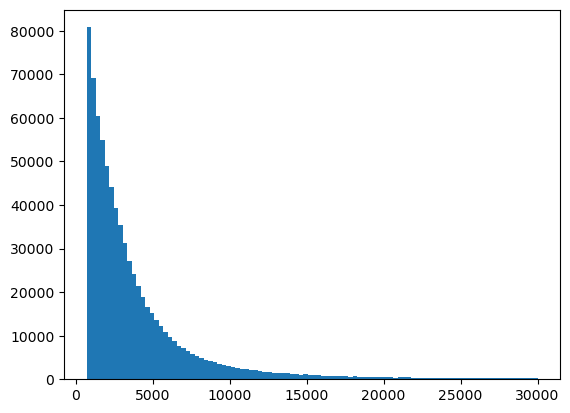

In [16]:
# plot distribution of text lengths
plt.hist(df.text.apply(lambda x: len(x)), bins=100)
plt.show()

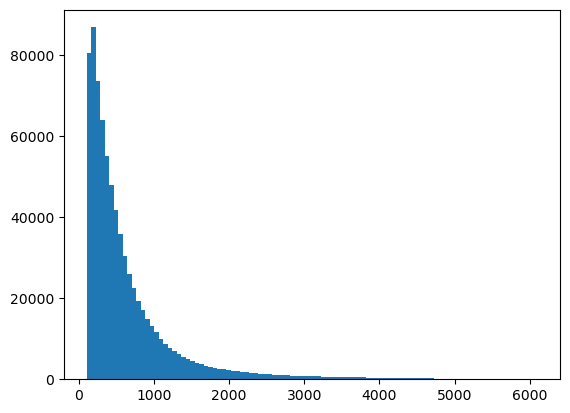

In [17]:
# plot distribution of text word lengths
plt.hist(df.text.apply(lambda x: len(x.split())), bins=100)
plt.show()

In [ ]:
# randomly truncate text to 100-1350 words


In [19]:
# make column with randomly picked 10 continuous words from each text
def get_seed(text):
    words = text.split()
    start = np.random.randint(0, len(words) - 10)
    return " ".join(words[start : start + 10])

df["seed"] = df.text.apply(get_seed)
print(df.head())

                                                text                  meta  \
0  I hope this blog finds you and yours healthy a...           RedPajamaC4   
1  Receive average discounts up to 70% off + free...           RedPajamaC4   
2  It was a full house for Huw Williams, and righ...           RedPajamaC4   
3  Professor Evgeny Oscarovich Paton (,  1870–195...    RedPajamaWikipedia   
4  Etymology gleanings for February 2016\nBy jing...  RedPajamaCommonCrawl   

                                                seed  
0  us to be temporarily insane. Stop drinking the...  
1   Time. You can use these Coupon codes to get upto  
2  Cripps has worked hard and long in promoting f...  
3  Paton (, 1870–1953) was a Russian and Soviet e...  
4  Theodor Arnold (1752, and later editions), rep...  


In [21]:
for i in range(30):
    print(df["seed"].iloc[i])

us to be temporarily insane. Stop drinking the Kool-Aid. Be
Time. You can use these Coupon codes to get upto
Cripps has worked hard and long in promoting folk in
Paton (, 1870–1953) was a Russian and Soviet engineer of
Theodor Arnold (1752, and later editions), republished in two volumes
not the heavy, sweet, sticky granules we know as 'brown
personalization, mailing and delivery tracking. We are certified to handle
go to someone else. All performances are at the Abbey
(i.e. tools are included/promoted in other projects or campaigns). Read
what was being taught at the time, he just didn't
the Zumwalt-class of guided missile destroyers, would be named USS
Sudan GOSS Press Release on the invasion of Abyei South
with potential partners are laying the groundwork for a system
combination with mystical activities. There have been various unexplained occurrences
extreme natural phenomena that would have scared Caral locals away
Law 'The Changing Face of Transitional Justice', Grotius Dialogue

In [22]:
df.to_csv("slimpajama.csv", index=False)